In [1]:
import os
import obspy
import matplotlib.pyplot as plt
import scipy
%matplotlib inline
%run helperfunctions.ipynb
os.getcwd()

'/Users/albertkong/grillochallenge'

In [2]:
os.chdir('lse_challenge/data')

In [3]:
# Signal List
os.chdir('signal')
signals = []
signal_files = os.listdir()
for sigfile in signal_files[0:100]: #Need to remove index for actual dataset
    tmp_trace = obspy.read(sigfile)
    cutlength = np.random.randint(900)
    trace_mat = [tmp_trace[0].data[cutlength:1000+cutlength], tmp_trace[1].data[cutlength:1000+cutlength], tmp_trace[2].data[cutlength:1000+cutlength]]
    signals.append([trace_mat, cutlength, 1])
    
    # Negative Transformations
    neg_mat = rot_xyz(trace_mat, 0, -np.pi, 0)
    signals.append([neg_mat, cutlength, 1])
    
    # X, Y, and Z Rotations by Theta
    theta = np.random.uniform()*2*np.pi
    x_mat = rot_x(trace_mat, theta)
    signals.append([x_mat, cutlength, 1])
    y_mat = rot_y(trace_mat, theta)
    signals.append([y_mat, cutlength, 1])
    z_mat = rot_z(trace_mat, theta)
    signals.append([z_mat, cutlength, 1])
    
    # General Rotation by alpha, beta, gamma
    alpha = np.random.uniform()*2*np.pi
    beta = np.random.uniform()*2*np.pi
    gamma = np.random.uniform()*2*np.pi
    rot_mat = rot_xyz(trace_mat, alpha, beta, gamma)
    signals.append([rot_mat, cutlength, 1])
    

# Noise List
os.chdir('../noise')
noise_files = os.listdir()
for noisefile in noise_files[0:100]: #Need to remove index for actual dataset
    tmp_trace = obspy.read(noisefile)
    cutlength = np.random.randint(900)
    trace_mat = [tmp_trace[0].data[cutlength:1000+cutlength], tmp_trace[1].data[cutlength:1000+cutlength], tmp_trace[2].data[cutlength:1000+cutlength]]
    signals.append([trace_mat, cutlength, 0])
    
    # Negative Transformations
    neg_mat = rot_xyz(trace_mat, 0, -np.pi, 0)
    signals.append([neg_mat, cutlength, 0])
    
    # X, Y, and Z Rotations by Theta
    theta = np.random.uniform()*2*np.pi
    x_mat = rot_x(trace_mat, theta)
    signals.append([x_mat, cutlength, 0])
    y_mat = rot_y(trace_mat, theta)
    signals.append([y_mat, cutlength, 0])
    z_mat = rot_z(trace_mat, theta)
    signals.append([z_mat, cutlength, 0])
    
    # General Rotation by alpha, beta, gamma
    alpha = np.random.uniform()*2*np.pi
    beta = np.random.uniform()*2*np.pi
    gamma = np.random.uniform()*2*np.pi
    rot_mat = rot_xyz(trace_mat, alpha, beta, gamma)
    signals.append([rot_mat, cutlength, 0])
    
os.chdir('../')
os.getcwd()

'/Users/albertkong/grillochallenge/lse_challenge/data'

In [4]:
sig_df = pd.DataFrame(signals, columns = ["trmatrix_cut", "cutlength", "signal"])
sig_df['p_arrival'] = 1000 - sig_df['cutlength']

In [5]:
sig_df.tail(10)

,trmatrix_cut,cutlength,signal,p_arrival
1190,"[[-0.0327503751876, 0.04324012006, -0.03976938...",605,0,395
1191,"[[-0.0260440154501, 0.0544241064473, -0.017138...",605,0,395
1192,"[[-0.105383116229, 0.00585801425603, -0.098944...",605,0,395
1193,"[[-0.0714298592583, -0.0552585393131, -0.07851...",605,0,395
1194,"[[-0.0403911955978, -0.0133891945973, 0.031612...",804,0,196
1195,"[[0.0403911955978, 0.0133891945973, -0.0316128...",804,0,196
1196,"[[-0.0403911955978, -0.0133891945973, 0.031612...",804,0,196
1197,"[[-0.0363346757222, -0.106783916556, -0.135727...",804,0,196
1198,"[[-0.00446862918937, -0.0658828679741, -0.0175...",804,0,196
1199,"[[0.081634987096, 0.128526097264, 0.0507198861...",804,0,196


306 : 1


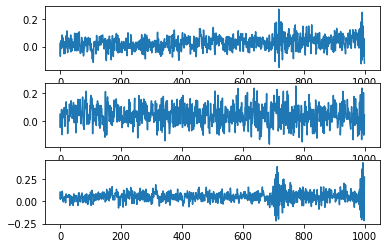

In [6]:
ind = np.random.randint(1199)
print(sig_df['cutlength'][ind],":",sig_df['signal'][ind])
plot_sig(sig_df, ind)

In [7]:
p_arrive = sig_df['p_arrival'][ind]

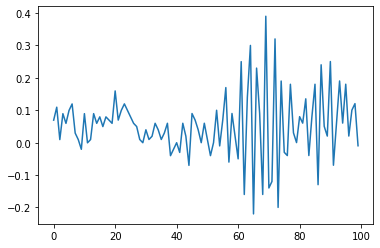

In [8]:
plt.plot(sig_df['trmatrix_cut'][ind][2][p_arrive-50:p_arrive+50])

In [9]:
print("STA:", np.var(sig_df['trmatrix_cut'][ind][2][p_arrive-12:p_arrive+13]))
print("LTA:", np.var(sig_df['trmatrix_cut'][ind][2][p_arrive-25:p_arrive+25]))

STA: 0.00661397410966
LTA: 0.0148594464787


In [10]:
print("STA:", np.mean(sig_df['trmatrix_cut'][ind][2][p_arrive-12:p_arrive+13]))
print("LTA:", np.mean(sig_df['trmatrix_cut'][ind][2][p_arrive-25:p_arrive+25]))

STA: 0.0228050025013
LTA: 0.0372


In [11]:
diff_arr_st = np.diff(sig_df['trmatrix_cut'][ind][2][p_arrive-12:p_arrive+13])
diff_arr_lt = np.diff(sig_df['trmatrix_cut'][ind][2][p_arrive-25:p_arrive+25])

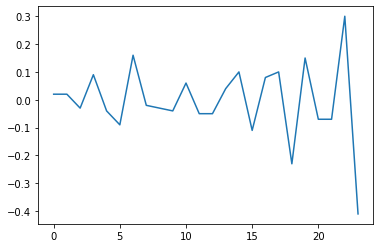

In [12]:
plt.plot(diff_arr_st)

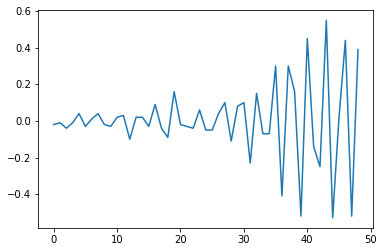

In [13]:
plt.plot(diff_arr_lt)

In [14]:
sig_df['trmatrix_cut'][ind][0][p_arrive-50:p_arrive+50]

array([-0.00953459,  0.00981084,  0.06910797,  0.01672302,  0.06731258,
        0.02932033,  0.00625533,  0.0081565 ,  0.04124352,  0.06811086,
       -0.00171836,  0.03578072,  0.06199695,  0.0682519 ,  0.01092034,
       -0.01898632,  0.01723968, -0.0101791 ,  0.00356862,  0.06159267,
        0.05665218,  0.07039989,  0.0654594 ,  0.06611663,  0.01562673,
        0.04684785,  0.02692183,  0.00074699, -0.02602069,  0.01204208,
        0.04077532, -0.02780995,  0.00717212, -0.02024666,  0.00659153,
        0.06342992, -0.00702126,  0.01173134, -0.0125776 ,  0.03736086,
        0.02865942, -0.03740885,  0.05807902,  0.08494636,  0.05127875,
       -0.00732588,  0.00206805, -0.00852844, -0.01847381, -0.02655329,
        0.03336581, -0.01771693,  0.04655595,  0.09400653,  0.02290425,
        0.01171493,  0.06168252,  0.03174673,  0.03675774,  0.00436321,
        0.07426294,  0.17099475, -0.11029379,  0.07125888,  0.10061409,
        0.00333084,  0.17928578, -0.01966976,  0.03959823,  0.08